In [30]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import time
from sklearn.preprocessing import StandardScaler, PowerTransformer, QuantileTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.pipeline import Pipeline
from sklearn.manifold import locally_linear_embedding
from sklearn.decomposition import PCA
import copy
from scipy.stats import shapiro, anderson


In [31]:
#path="../data/transactions_dropped_150_NaN.csv"
#path="../data/transactions_with_outliers.csv"
path="../data/labelled_transactions.csv"

card_df = pd.read_csv(path)
card_df=card_df.loc[:, ~card_df.columns.str.contains('^Unnamed')]
card_df=card_df.loc[:, ~card_df.columns.str.contains('customer_id')]
#card_df=card_df[card_df["Outlier_CBLOF"]==0]
#card_df=card_df[card_df["Outlier_IF"]==0].fillna(0)
card_df=card_df.loc[:, ~card_df.columns.str.contains('Outlier_CBLOF')]
card_df=card_df.loc[:, ~card_df.columns.str.contains('Outlier_IF')]
myfeats=card_df.columns.to_list()
print(card_df[card_df.isna().any(axis=1)])


categorical_features = card_df.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_features = card_df.select_dtypes(include=['int', 'float']).columns.tolist()

mynumfeats=list(numeric_features)
std=StandardScaler()
pwtr=PowerTransformer()
qtr=QuantileTransformer(n_quantiles=3)
# pca = PCA(n_components=0.90)
pca = PCA()
print()

Empty DataFrame
Columns: [balance_account, purchases_amount, paid_advance, full_purchases, balance_frequency_update, installments, purchases_frequency, full_purchases_frequency, purchases_installments_frequency, cash_advance_frequency, nr_cash_advances, nr_purchases, credit_limit, fixed_rate_period, payments, min_payments, full_payment_prc, KMeans_label, labels_hierarchical_3c, labels_hierarchical_9c]
Index: []



In [32]:
transf_df=copy.copy(card_df[numeric_features].to_numpy())#
stdevs=np.std(transf_df,axis=0)
#transf_df=transf_df/stdevs
transf_df=std.fit_transform(transf_df)
X_pca = pca.fit_transform(transf_df)

locquals=[]
locquals2=[]
for varind in range(len(X_pca.T)):
    var=X_pca.T[varind]
    shpro=shapiro(var)
    locquals2.append(shpro.statistic)

#plotindx1=locquals2.index(sorted(locquals2)[1])
#plotindx2=locquals2.index(sorted(locquals2)[0])
#plotindx3=locquals2.index(sorted(locquals2)[2])
#plotindx1=locquals2.index(sorted(locquals2)[2])
#plotindx2=locquals2.index(sorted(locquals2)[1])
#plotindx3=locquals2.index(sorted(locquals2)[3])
plotindx1=0
plotindx2=1
plotindx3=2

#plotindx1=1
#plotindx2=2
#plotindx3=3


plotax1=X_pca[:, plotindx1]
plotax2=X_pca[:, plotindx2]
plotax3=X_pca[:, plotindx3]

myind1=np.zeros(len(locquals2))
myind2=np.zeros(len(locquals2))
myind3=np.zeros(len(locquals2))
myind1[plotindx1]=1.
myind2[plotindx2]=1.
myind3[plotindx3]=1.

myind1UNWRPD=(pca.inverse_transform(myind1))
ind1Impactor=list(np.abs(myind1UNWRPD)).index(max(list(np.abs(myind1UNWRPD))))
#myind1UNWRPD=np.array(myind1UNWRPD)*stdevs
myind1UNWRPD=std.inverse_transform(myind1UNWRPD)
plotax1=plotax1/myind1UNWRPD[ind1Impactor]
myind1UNWRPD=myind1UNWRPD/myind1UNWRPD[ind1Impactor]
xstr=numeric_features[ind1Impactor]+" -equivalent"


myind2UNWRPD=list(pca.inverse_transform(myind2))
ind2Impactor=list(np.abs(myind2UNWRPD)).index(max(list(np.abs(myind2UNWRPD))))
#if ind2Impactor==ind1Impactor:
#    ind2Impactor=myind2UNWRPD.index(sorted(myind2UNWRPD)[-2])

#myind2UNWRPD=np.array(myind2UNWRPD)*stdevs
myind2UNWRPD=std.inverse_transform(myind2UNWRPD)
plotax2=plotax2/myind2UNWRPD[ind2Impactor]
myind2UNWRPD=myind2UNWRPD/myind2UNWRPD[ind2Impactor]
ystr=numeric_features[ind2Impactor]+" -equivalent"

myind3UNWRPD=list(pca.inverse_transform(myind3))
ind3Impactor=list(np.abs(myind3UNWRPD)).index(max(list(np.abs(myind3UNWRPD))))
#if ind3Impactor==ind1Impactor:
#    ind3Impactor=myind3UNWRPD.index(sorted(myind3UNWRPD)[-2])
#    if ind3Impactor==ind2Impactor:
#        ind3Impactor=myind3UNWRPD.index(sorted(myind3UNWRPD)[-3])
#if ind3Impactor==ind2Impactor:
#    ind3Impactor=myind3UNWRPD.index(sorted(myind3UNWRPD)[-2])
#    if ind3Impactor==ind2Impactor:
#        ind3Impactor=myind3UNWRPD.index(sorted(myind3UNWRPD)[-3])

#myind3UNWRPD=np.array(myind3UNWRPD)*stdevs
myind3UNWRPD=std.inverse_transform(myind3UNWRPD)
plotax3=plotax3/myind3UNWRPD[ind2Impactor]
myind3UNWRPD=myind3UNWRPD/myind3UNWRPD[ind3Impactor]
zstr=numeric_features[ind3Impactor]+" -equivalent"


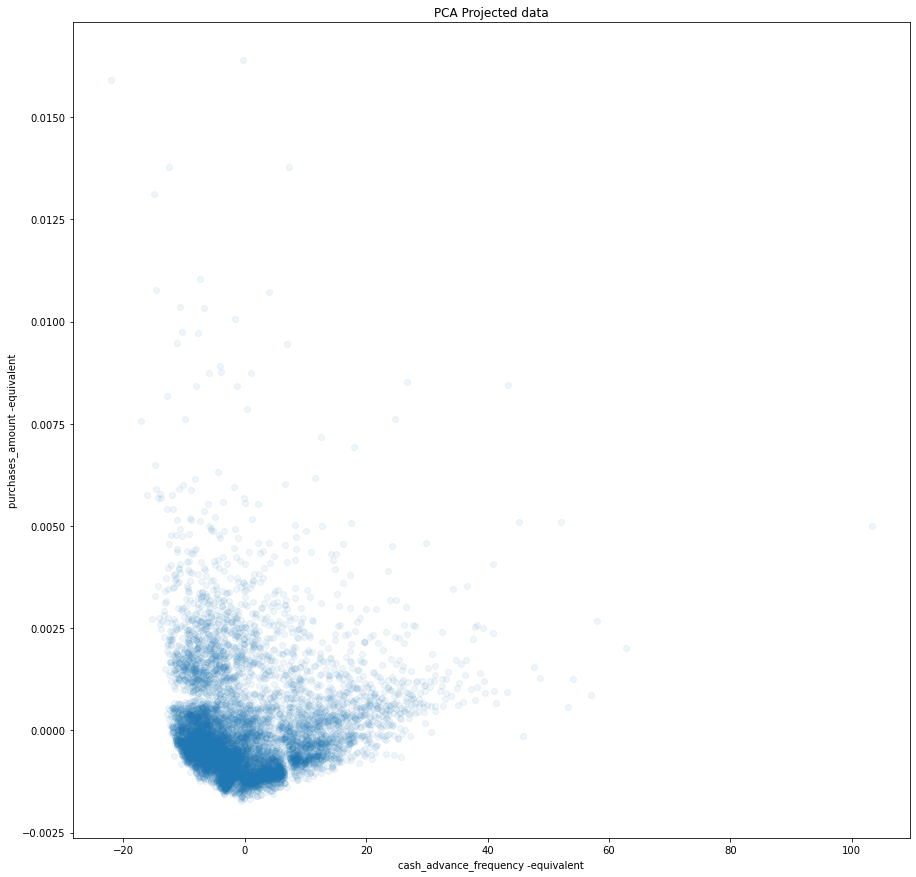

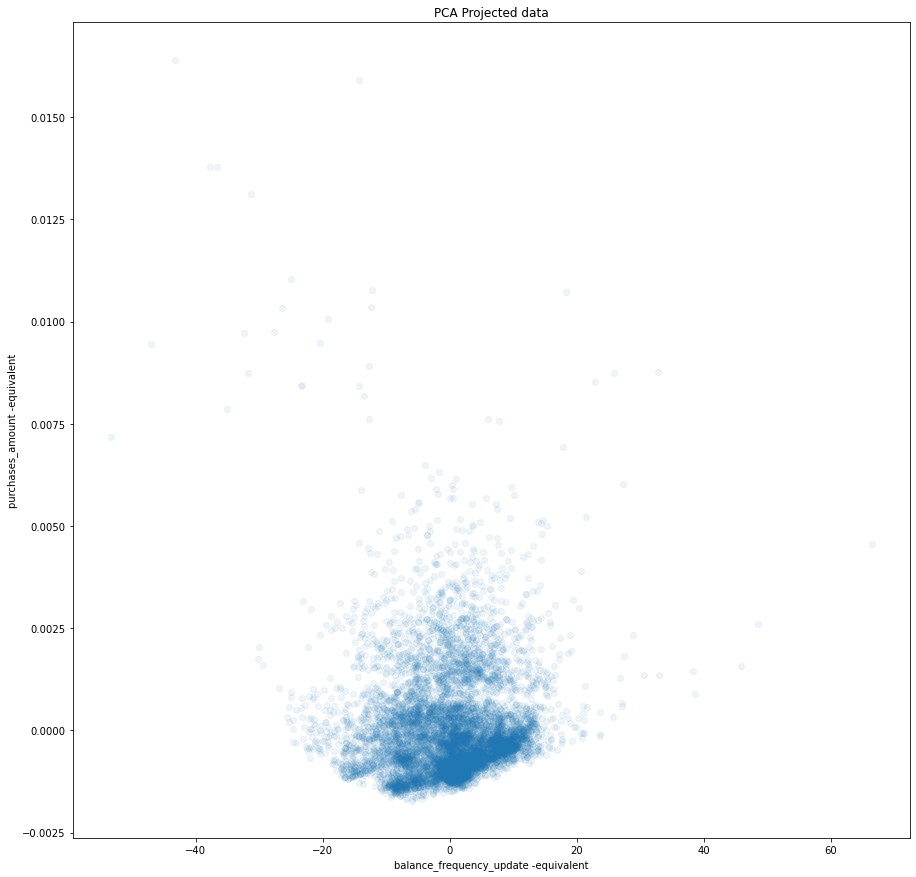

x: [1.08897480e+00 1.00000000e+00 6.27412059e-01 6.23195648e-01
 5.09526901e-04 3.77001325e-01 3.28712380e-04 1.58126747e-04
 2.48492317e-04 7.69744168e-05 1.97157706e-03 1.29580958e-02
 3.07744370e+00 6.53342617e-03 1.42281164e+00 5.82871665e-01
 9.96081316e-05 7.43034776e-04 1.59864419e-04 2.10136644e-03]
y: [1.03779383e+04 3.64451801e+03 8.27848792e+03 2.30467583e+03
 4.04632234e+00 1.34077401e+03 1.70282628e+00 7.75089690e-01
 1.18357309e+00 1.00000000e+00 2.70336268e+01 5.06148341e+01
 2.31913492e+04 5.18769094e+01 9.74370677e+03 5.29987459e+03
 4.08338030e-01 6.62509756e+00 1.09490300e+00 1.45431913e+01]
z: [1.85925312e+03 8.76585210e+02 1.10578241e+03 2.94869971e+02
 1.00000000e+00 5.82113586e+02 6.30146174e-01 1.86607177e-01
 5.34949381e-01 1.78914133e-01 4.66935195e+00 1.93012186e+01
 3.41481630e+03 1.17987456e+01 1.35745505e+03 1.51172439e+03
 1.15808174e-01 1.55459002e+00 7.61303838e-02 2.32095269e+00]


In [33]:
plt.rcParams["figure.figsize"] = (15, 15)

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(plotax2, plotax1, alpha=0.07)
plt.axis('tight')
# plt.xticks([]), plt.yticks([])
plt.xlabel(ystr)
plt.ylabel(xstr)

plt.title('PCA Projected data')
plt.show()

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(plotax3, plotax1, alpha=0.07)
plt.axis('tight')
# plt.xticks([]), plt.yticks([])
plt.xlabel(zstr)
plt.ylabel(xstr)

plt.title('PCA Projected data')
plt.show()

print("x:", myind1UNWRPD)
print("y:", myind2UNWRPD)
print("z:", myind3UNWRPD)


In [34]:
import umap
reducer = umap.UMAP(n_components=2)
#reducer = umap.UMAP(n_components=5)
mystuff=copy.copy(card_df[numeric_features]).to_numpy()
mystuff=std.fit_transform(mystuff)
mystuff=pwtr.fit_transform(mystuff)
embedding = reducer.fit_transform(mystuff)
embedding.shape

(8500, 2)

For n_clusters = 8 The average silhouette_score is : 0.6236


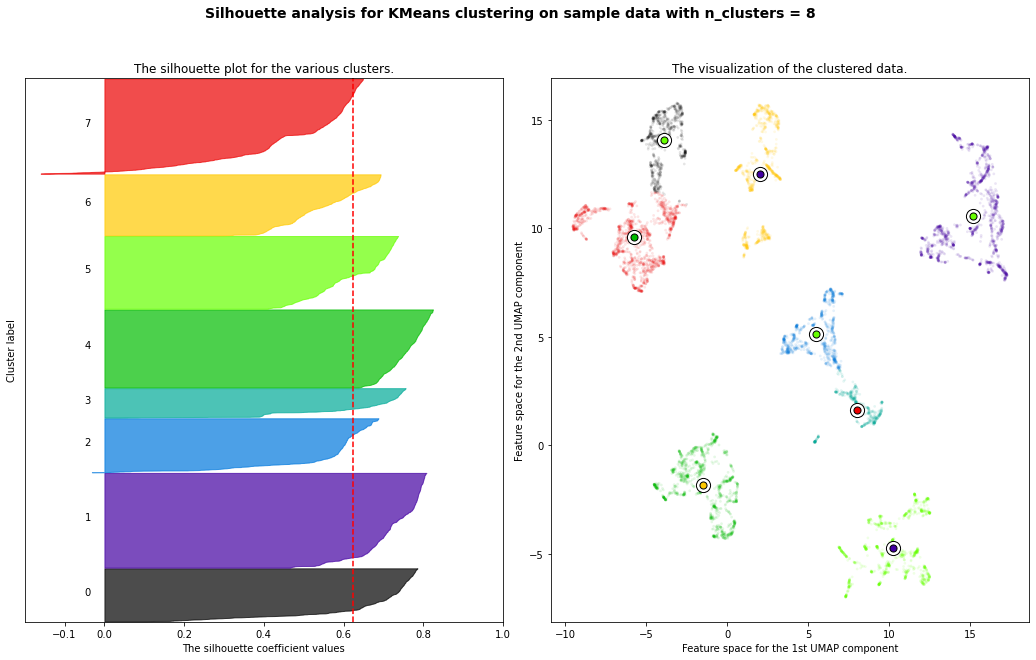

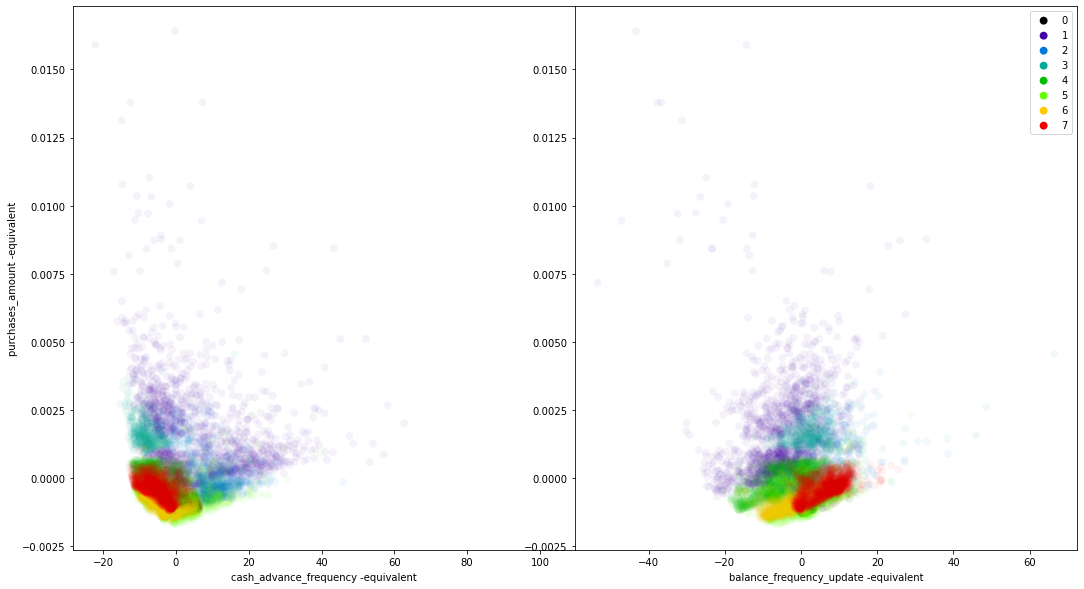

In [35]:
''' Note: The code below is directly took from sklearn documentation of silhoutte analysis.
          And so you do not have to spend time trying to understand the code'''

range_n_clusters = range(8, 9)

r_seed = 42

for n_clusters in range_n_clusters:

    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 10)
    fig.subplots_adjust(wspace=0.1, hspace=0)
    # The 1st subplot is the silhouette plot
    
    # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.2, 1]
    ax1.set_xlim([-0.2, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(embedding) + (n_clusters + 1) * 10])

    # Initialize the Pipeline with n_clusters value and a random generator seed for reproducibility.
    kmeans_pipeline = Pipeline([
            ("scaler", StandardScaler()),
            ("cluster", KMeans(n_clusters=n_clusters, random_state=r_seed, verbose=0))])
    
    cluster_labels = kmeans_pipeline.fit_predict(embedding)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(embedding, cluster_labels)
    print("For n_clusters =",
          n_clusters,
          "The average silhouette_score is :",
          silhouette_avg.round(4))

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(embedding, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i + 0.) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0,
                          ith_cluster_silhouette_values,
                          facecolor=color,
                          edgecolor=color,
                          alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral((cluster_labels.astype(float) + 0.) / n_clusters)
    # Labeling the clusters
    pipeline_centers = kmeans_pipeline.named_steps["cluster"].cluster_centers_
    centers = kmeans_pipeline.named_steps["scaler"].inverse_transform(pipeline_centers)
    ax2.scatter(embedding[:,0],
                embedding[:,1], 
                marker=".", 
                s=30, 
                lw=0, 
                alpha=0.1, 
                c=colors, 
                edgecolor="k")
    ax2.scatter(centers[:, 0],centers[:, 1],marker="o",c="white",alpha=1,s=200,edgecolor="k",)

    for i, c in enumerate(centers):
        color=colors[i]
        ax2.scatter(c[0], c[1], alpha=1, s=50,color=color, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st UMAP component")
    ax2.set_ylabel("Feature space for the 2nd UMAP component")
    plt.suptitle(
        (
            "Silhouette analysis for KMeans clustering on sample data "
            "with n_clusters = %d" % n_clusters
        ),
        fontsize=14,
        fontweight="bold",
    )
    plt.show()
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 10)
    fig.subplots_adjust(wspace=0.0, hspace=0)
    for clust in range(n_clusters):
        cluster_labels.astype(int)
        
        locax1=[]
        locax2=[]
        locax3=[]
        loccolors=[]
        for custind in range(len(cluster_labels)):
            if cluster_labels[custind]==clust:
                locax1.append(plotax1[custind])
                locax2.append(plotax2[custind])
                locax3.append(plotax3[custind])
                loccolors.append(colors[custind])
        
        ax1.scatter(locax2,
                locax1,
                marker=".", 
                s=250, 
                lw=0, 
                alpha=0.05, 
                #c=colors,
                label=str(clust),
                c=loccolors, 
                edgecolor="k")
        ax2.scatter(locax3,
                locax1,
                marker=".", 
                s=250, 
                lw=0, 
                alpha=0.05, 
                #c=colors, 
                label=str(clust),
                c=loccolors, 
                edgecolor="k")
    ax2.set_xlabel(zstr)
    leg2=ax2.legend()
    for lh in leg2.legendHandles: 
        lh.set_alpha(1)
    ax1.set_xlabel(ystr)
    ax1.set_ylabel(xstr)
    #ax1.legend()
    #leg1=ax1.legend()
    #for lh in leg1.legendHandles: 
        #lh.set_alpha(1)
#    ax2.set_ylabel(xstr)

    plt.show()
print("\n")
plt.show()

In [36]:
kmeans_pipeline = Pipeline([
            ("scaler", StandardScaler()),
            ("cluster", KMeans(n_clusters=n_clusters, random_state=r_seed, verbose=0))])
    
cluster_labels = kmeans_pipeline.fit_predict(embedding)
print(cluster_labels)

[5 5 5 ... 5 0 4]


In [39]:
path="../data/labelled_transactions.csv"

card_df = pd.read_csv(path)
card_df["PowTrUMAT"]=cluster_labels
card_df.to_csv("../data/labelled_transactions2.csv", index=False)